1. Melakukan Mounting G-Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


2. Membuat path untuk dataset

In [2]:
path = "/content/gdrive/MyDrive/machine_learning/pertemuan05"

3. Import seluruh library yang akan digunakan

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

4. Load dataset

In [6]:
df = pd.read_csv(path + "/praktikum_mandiri/data/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


5. Membuat variabel X dan y

In [7]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

6. Melakukan encode ke bentuk numerik pada variabel y

In [8]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

7. Membagi dataset menjadi data training dan testing

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_encoded,
    test_size=0.2,
    random_state=42
    )

8. Membuat model DecisionTree

In [10]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

9. Uji model dengan data testing

In [11]:
y_pred = model.predict(X_test)

10. Evaluasi model

In [16]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



11. Visualisasi Decision Tree

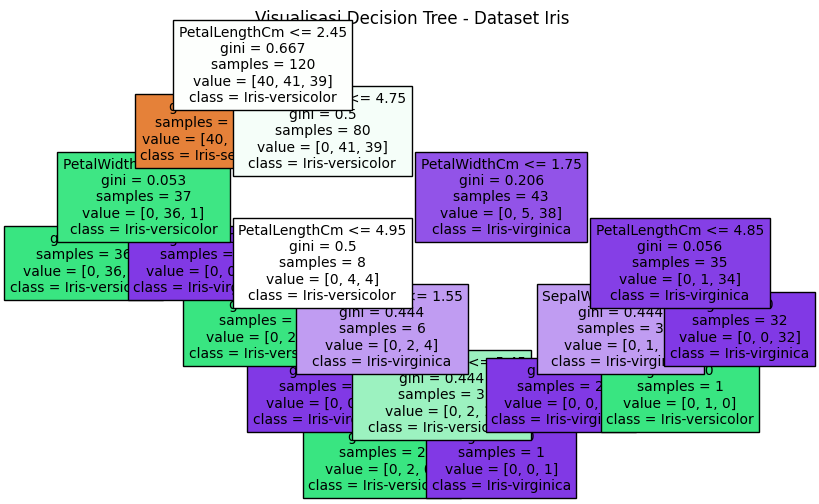

In [18]:
plt.figure(figsize=(10,6))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=label_encoder.classes_,
    filled=True,
    fontsize=10
)
plt.title("Visualisasi Decision Tree - Dataset Iris")
plt.show()